In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print("train images shape : ",train_images.shape)
print("train labels shape : ",train_labels.shape)
print("test images shape : ",test_images.shape)
print("test labels shape : ",test_labels.shape)

train images shape :  (60000, 28, 28, 1)
train labels shape :  (60000, 10)
test images shape :  (10000, 28, 28, 1)
test labels shape :  (10000, 10)


In [4]:
# Data Preprocessing
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)


In [6]:

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 66s 34ms/step - loss: 0.1507 - accuracy: 0.9537 - val_loss: 0.0498 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0388 - val_accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0330 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0312 - val_accuracy: 0.9902


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0312 - accuracy: 0.9902
Test accuracy: 0.9901999831199646


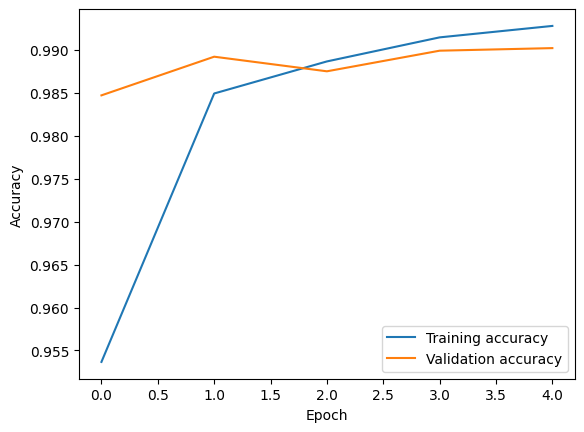

In [9]:
# Visualize the results
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 115ms/step


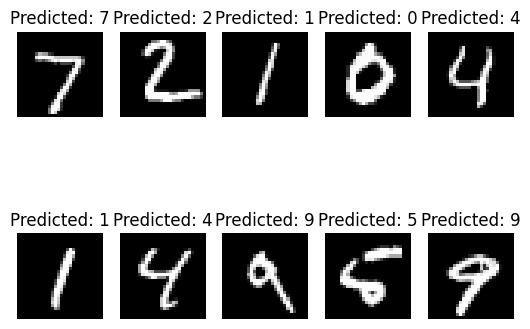

In [10]:
predictions = model.predict(test_images[:10])
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title('Predicted: {}'.format(np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

In [11]:
model.save("mnist_cnn_digit_classification.h5")

In [16]:
from PIL import Image 
# Load the model
model = keras.models.load_model('mnist_cnn_digit_classification.h5')

# Preprocess your own image
img = Image.open('/content/drive/MyDrive/images/3.PNG').convert('L')
img = img.resize((28,28))
img_arr = np.array(img)
img_arr = img_arr.astype('float32') / 255.0
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = np.expand_dims(img_arr, axis=-1)

# Make a prediction
pred = model.predict(img_arr)
print('Prediction:', np.argmax(pred))

1/1 [==============================] - 0s 173ms/step
Prediction: 3
